In [17]:
import json, gzip, pandas as pd
from collections import defaultdict
results=defaultdict(set)
line_num=0
fn='2012_beer.json'
#fn='beer_2012.json.gz'
with open('/mnt/snelson/pepsi_dsrp/'+fn, 'r') as f:
    for line in f:
        line_num+=1
        try:
            #if line_num>100:
            #    break
            data=json.loads(line)
            body=data['body']
            dt=data['postedTime'][:10] #daily
            user_id=data['actor']['id'][15:]
            results[dt].add(user_id)
        except:
            continue
        

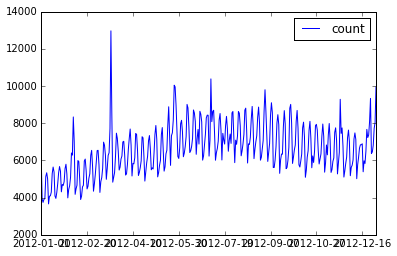

In [27]:
## plot unique users by day
import matplotlib as plt
%matplotlib inline
unique_users_by_dt={k:len(v) for k,v in results.items()}
df=pd.DataFrame.from_dict(unique_users_by_dt, orient='index')
df.columns=['count']
df=df.sort()
df.plot()


In [28]:
tweet_count_by_dt=defaultdict(int)
line_num=0
fn='2012_beer.json'
#fn='beer_2012.json.gz'
with open('/mnt/snelson/pepsi_dsrp/'+fn, 'r') as f:
    for line in f:
        line_num+=1
        try:
            #if line_num>100:
            #    break
            data=json.loads(line)
            dt=data['postedTime'][:10] #daily
            tweet_count_by_dt[dt]+=1
        except:
            continue
tweet_count_by_dt

defaultdict(int,
            {u'2012-01-01': 6346,
             u'2012-01-02': 4050,
             u'2012-01-03': 3912,
             u'2012-01-04': 4080,
             u'2012-01-05': 4130,
             u'2012-01-06': 5337,
             u'2012-01-07': 5508,
             u'2012-01-08': 5209,
             u'2012-01-09': 3843,
             u'2012-01-10': 4238,
             u'2012-01-11': 4281,
             u'2012-01-12': 4518,
             u'2012-01-13': 5488,
             u'2012-01-14': 5839,
             u'2012-01-15': 5571,
             u'2012-01-16': 4270,
             u'2012-01-17': 4155,
             u'2012-01-18': 4633,
             u'2012-01-19': 5028,
             u'2012-01-20': 5591,
             u'2012-01-21': 5880,
             u'2012-01-22': 5590,
             u'2012-01-23': 4492,
             u'2012-01-24': 4892,
             u'2012-01-25': 4841,
             u'2012-01-26': 5068,
             u'2012-01-27': 5854,
             u'2012-01-28': 5982,
             u'2012-01-29': 543

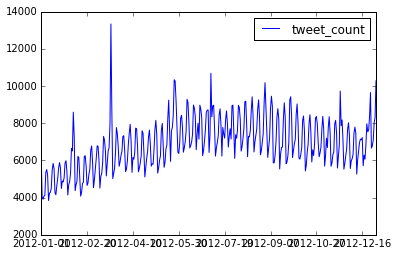

In [39]:
tweet_count_df=pd.DataFrame.from_dict(tweet_count_by_dt, orient='index')
tweet_count_df.columns=['tweet_count']
tweet_count_df=tweet_count_df.sort()
tweet_count_df.plot()

In [40]:
print(df)


            count
2012-01-01   6179
2012-01-02   3937
2012-01-03   3743
2012-01-04   3906
2012-01-05   3955
2012-01-06   5136
2012-01-07   5335
2012-01-08   5009
2012-01-09   3661
2012-01-10   4077
2012-01-11   4094
2012-01-12   4296
2012-01-13   5289
2012-01-14   5643
2012-01-15   5377
2012-01-16   4089
2012-01-17   3957
2012-01-18   4278
2012-01-19   4740
2012-01-20   5337
2012-01-21   5670
2012-01-22   5420
2012-01-23   4310
2012-01-24   4709
2012-01-25   4652
2012-01-26   4857
2012-01-27   5559
2012-01-28   5793
2012-01-29   5262
2012-01-30   3985
...           ...
2012-12-02   7005
2012-12-03   5176
2012-12-04   5621
2012-12-05   5739
2012-12-06   6020
2012-12-07   7148
2012-12-08   7478
2012-12-09   7126
2012-12-10   5017
2012-12-11   5765
2012-12-12   6163
2012-12-13   6659
2012-12-14   6840
2012-12-15   6840
2012-12-16   6894
2012-12-17   5388
2012-12-18   5978
2012-12-19   5836
2012-12-20   6493
2012-12-21   7668
2012-12-22   7228
2012-12-23   7363
2012-12-24   8094
2012-12-25

In [41]:
print(tweet_count_df)

            tweet_count
2012-01-01         6346
2012-01-02         4050
2012-01-03         3912
2012-01-04         4080
2012-01-05         4130
2012-01-06         5337
2012-01-07         5508
2012-01-08         5209
2012-01-09         3843
2012-01-10         4238
2012-01-11         4281
2012-01-12         4518
2012-01-13         5488
2012-01-14         5839
2012-01-15         5571
2012-01-16         4270
2012-01-17         4155
2012-01-18         4633
2012-01-19         5028
2012-01-20         5591
2012-01-21         5880
2012-01-22         5590
2012-01-23         4492
2012-01-24         4892
2012-01-25         4841
2012-01-26         5068
2012-01-27         5854
2012-01-28         5982
2012-01-29         5435
2012-01-30         4139
...                 ...
2012-12-02         7374
2012-12-03         5563
2012-12-04         5972
2012-12-05         6093
2012-12-06         6327
2012-12-07         7468
2012-12-08         7789
2012-12-09         7458
2012-12-10         5263
2012-12-11      

In [55]:
df['dt']=df.index
tweet_count_df['dt']=tweet_count_df.index
print(tweet_count_df.columns)
print(df.columns)
c=df.merge(tweet_count_df)
c['avg_tweets_pp']=c['tweet_count']/c['count']
print(c)



Index([u'tweet_count', u'dt'], dtype='object')
Index([u'count', u'dt'], dtype='object')
     count          dt  tweet_count  avg_tweets_pp
0     6179  2012-01-01         6346       1.027027
1     3937  2012-01-02         4050       1.028702
2     3743  2012-01-03         3912       1.045151
3     3906  2012-01-04         4080       1.044547
4     3955  2012-01-05         4130       1.044248
5     5136  2012-01-06         5337       1.039136
6     5335  2012-01-07         5508       1.032427
7     5009  2012-01-08         5209       1.039928
8     3661  2012-01-09         3843       1.049713
9     4077  2012-01-10         4238       1.039490
10    4094  2012-01-11         4281       1.045677
11    4296  2012-01-12         4518       1.051676
12    5289  2012-01-13         5488       1.037625
13    5643  2012-01-14         5839       1.034733
14    5377  2012-01-15         5571       1.036080
15    4089  2012-01-16         4270       1.044265
16    3957  2012-01-17         4155       1.0

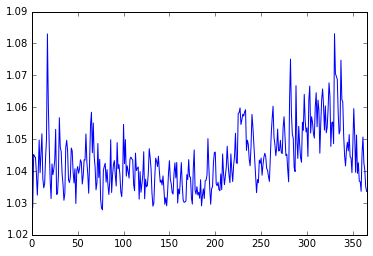

In [56]:
## seems to be an uptick in the tweeting rate in the latter 
## half of the year for the beer audience
c['avg_tweets_pp'].plot()

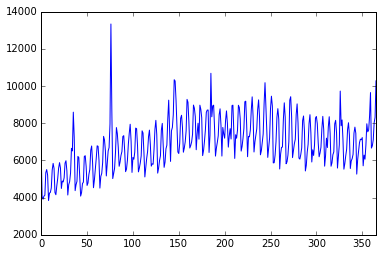

In [53]:
c['tweet_count'].plot()


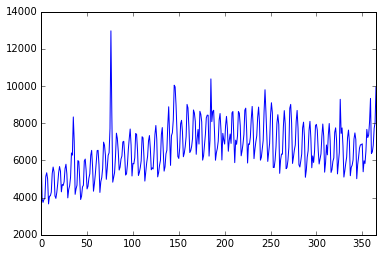

In [54]:
c['count'].plot()